In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import math

In [372]:
from sklearn.datasets import load_digits

digits = load_digits()

x, y = load_digits()['data'], load_digits()['target']

# add the bias
xx = np.insert(x, 0, 1, axis=1)

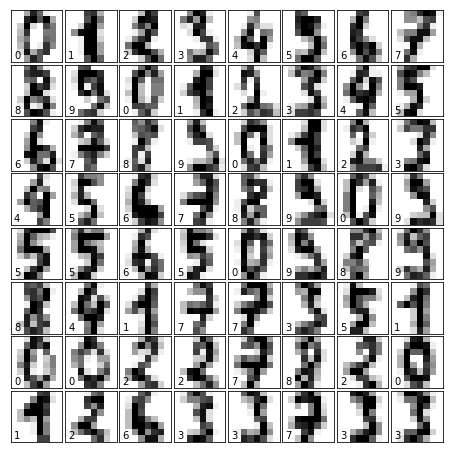

In [373]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [387]:
# shapes
m, n = x.shape

neurons1 = 30
neurons2 = 10

# initial parameters
theta1 = np.random.normal(loc=0.0, scale=0.02, size=(n+1)*neurons1).reshape(-1, n+1)
theta2 = np.random.normal(loc=0.0, scale=0.02, size=(neurons1+1)*neurons2).reshape(-1, neurons1+1)

# encoding y
yy = np.zeros(m*10).reshape(10, m)
for i in range(m):
    yy[y[i], i] = 1
yy

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [388]:
# sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigrad(z):
    return sigmoid(z)*(1-sigmoid(z))

# evaluate
def evaluate(theta1, theta2, x):
    a1 = x
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    try:
        a2 = np.insert(a2, 0, 1, axis=1)
    except:
        a2 = np.insert(a2, 0, 1, axis=0)
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return a1, a3, z3, a2, z2

# cost
def cost(theta1, theta2, x, y, m):
    a1, a3, z3, a2, z2 = evaluate(theta1, theta2, x)
    return np.sum(-y.T*np.log(a3)-(1-y.T)*np.log(1-a3))/m

In [389]:
error = []


for epoch in range(1000):
    adder1 = 0
    adder2 = 0
    error.append(cost(theta1, theta2, xx, yy, m))
    for i in range(len(xx)):
        alpha = 0.0005

        # theta2grad
        theta1_grad = theta1[:, 1:]
        theta2_grad = theta2[:, 1:]

        # 1 e 2
        a1, a3, z3, a2, z2 = evaluate(theta1, theta2, xx[i, :])
        delta3 = a3 - yy[:, 1].T

        # 3 -- layer 2
        e1 = delta3.dot(theta2)[1:, np.newaxis]
        e2 = sigrad(z2)[:, np.newaxis]
        delta2 = e1*e2
        
        # aadder
        adder2 += delta3[:, np.newaxis]*a2[1:, np.newaxis].T
        adder1 += (delta2.dot(a1[1:, np.newaxis].T))

    # 4
    theta2_grad -= adder2*alpha/m
    theta1_grad -= adder1*alpha/m
    theta1[:, 1:] = theta1_grad
    theta2[:, 1:] = theta2_grad

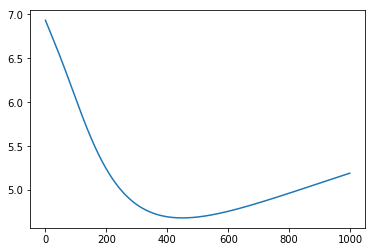

In [390]:
plt.plot(error)